<a href="https://colab.research.google.com/github/txc-000/machine-learning/blob/main/ML_A11_2023_14913_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Kebutuhan Perawatan Kesehatan Mental di Industri Teknologi

### Nama    : (Faidzul Umam)
### NIM     : (A11.2023.14913)
----------------------------------------------------------------
### Ringkasan/Permasalahan Project dan Tujuan yang Akan Dicapai
#### Permasalahan:
Dataset ini berisi hasil survei tentang kesehatan mental di industri teknologi pada tahun 2014. Banyak faktor seperti demografi, lingkungan kerja, dan riwayat keluarga yang dapat memengaruhi kondisi kesehatan mental seseorang dan keputusannya untuk mencari bantuan. Tantangannya adalah mengidentifikasi faktor-faktor kunci ini dan memprediksi kemungkinan seseorang mencari perawatan (treatment) untuk kondisi kesehatan mentalnya.

#### Tujuan:
Membangun model machine learning klasifikasi yang akurat untuk memprediksi apakah seorang karyawan di bidang teknologi akan mencari perawatan kesehatan mental. Model ini akan menggunakan berbagai algoritma seperti Logistic Regression, Random Forest, dan XGBoost. Tujuannya adalah untuk membantu perusahaan atau organisasi dalam menciptakan lingkungan kerja yang lebih suportif dan proaktif dalam menyediakan sumber daya kesehatan mental.

----------------------------------------------------------------
### Dataset: Kaggle - Mental Health in Tech Survey
- **Sumber**: Kaggle (https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey)
- **Tahun**: 2014
- **Sampel Data**: 1259 sampel
- **Fitur**: 26 fitur (demografi, sikap terhadap kesehatan mental, riwayat, dll.)
- **Target**: `treatment` (Apakah seseorang mencari perawatan? Yes/No)

### Kategori Fitur:
1. **Demografi**: Age, Gender, country, state
2. **Riwayat Kesehatan**: family_history, treatment (target), work_interfere
3. **Kondisi & Fasilitas Kerja**: self_employed, no_employees, remote_work, tech_company
4. **Dukungan & Pengetahuan**: benefits, care_options, wellness_program, seek_help, anonymity, leave
5. **Sikap & Persepsi**: mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence

## 1. Import Library

In [ ]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import library untuk preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve

# Import algoritma machine learning (Klasifikasi)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Import untuk evaluasi model (Klasifikasi)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Setting untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ Semua library berhasil diimpor!")

✅ Semua library berhasil diimpor!


## 2. Membaca Dataset

In [ ]:
# Load dataset dari path lokal
data_path = "dataset/survey.csv"

print("📥 Loading dataset dari path lokal...")

# Load data
df = pd.read_csv(data_path)
print(f"✅ Data loaded: {df.shape}")

print(f"\n📊 Dataset: Mental Health in Tech Survey")
print(f"📅 Tahun: 2014")
print(f"🧑‍💻 Sampel: {len(df):,}")
print(f"📋 Total fitur: {len(df.columns)-1} (tidak termasuk target 'treatment')")
print(f"🎯 Target: treatment (Sought mental health treatment)")

📥 Loading dataset dari path lokal...
✅ Data loaded: (1259, 27)

📊 Dataset: Mental Health in Tech Survey
📅 Tahun: 2014
🧑‍💻 Sampel: 1,259
📋 Total fitur: 26 (tidak termasuk target 'treatment')
🎯 Target: treatment (Sought mental health treatment)


## 3. Exploratory Data Analysis (EDA) & Data Cleaning

In [ ]:
# Informasi dasar dataset
print("=== INFORMASI DASAR DATASET ===")
print(f"Shape data: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")

print("\n=== TIPE DATA ===")
print(df.dtypes.value_counts())

print("\n=== STATISTIK TARGET (treatment) ===")
print(df['treatment'].value_counts())

=== INFORMASI DASAR DATASET ===
Shape data: (1259, 27)
Total missing values: 1892

=== TIPE DATA ===
object    26
int64      1
Name: count, dtype: int64

=== STATISTIK TARGET (treatment) ===
treatment
Yes    637
No     622
Name: count, dtype: int64


In [ ]:
# Preview data
print("=== PREVIEW DATA ===")
display(df.head())

=== PREVIEW DATA ===


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#### Data Cleaning
Beberapa kolom seperti `Timestamp`, `comments`, `state`, dan `Country` tidak akan digunakan karena tidak relevan atau memiliki terlalu banyak kategori. Kolom `Age` dan `Gender` juga akan dibersihkan dari nilai yang tidak valid atau beragam.

In [ ]:
# Data Cleaning
print(f"Shape data sebelum cleaning: {df.shape}")

# 1. Drop kolom yang tidak relevan atau terlalu banyak missing values
df_cleaned = df.drop(['Timestamp', 'state', 'comments', 'Country'], axis=1)
print(f"Menghapus kolom tidak relevan: ['Timestamp', 'state', 'comments', 'Country']")

# 2. Cleaning 'Gender' column
print("Membersihkan kolom 'Gender'...")
print(f"Unik Gender (sebelum): {df_cleaned['Gender'].nunique()}")
df_cleaned['Gender'].replace(['Male ', 'male', 'M', 'm', 'Make', 'Cis Male', 'Man', 'msle', 'Mail', 'Mal', 'Cis Man', 'Male-ish', 'Male (CIS)'], 'Male', inplace=True)
df_cleaned['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'w', 'Female (cis)'], 'Female', inplace=True)
df_cleaned['Gender'] = df_cleaned['Gender'].apply(lambda x: x if x in ['Male', 'Female'] else 'Other')
print(f"Unik Gender (sesudah): {df_cleaned['Gender'].nunique()}")

# 3. Cleaning 'Age' column (handle outliers dan nilai tidak valid)
print("Membersihkan kolom 'Age' (menghapus outlier)...")
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned[(df_cleaned['Age'] >= 18) & (df_cleaned['Age'] <= 75)]
rows_removed = initial_rows - len(df_cleaned)
print(f"Jumlah baris yang dihapus karena umur tidak valid: {rows_removed}")

print("✅ Data cleaning selesai!")
print(f"Shape data sesudah cleaning: {df_cleaned.shape}")

Shape data sebelum cleaning: (1259, 27)
Menghapus kolom tidak relevan: ['Timestamp', 'state', 'comments', 'Country']
Membersihkan kolom 'Gender'...
Unik Gender (sebelum): 49
Unik Gender (sesudah): 3
Membersihkan kolom 'Age' (menghapus outlier)...
Jumlah baris yang dihapus karena umur tidak valid: 8
✅ Data cleaning selesai!
Shape data sesudah cleaning: (1251, 23)


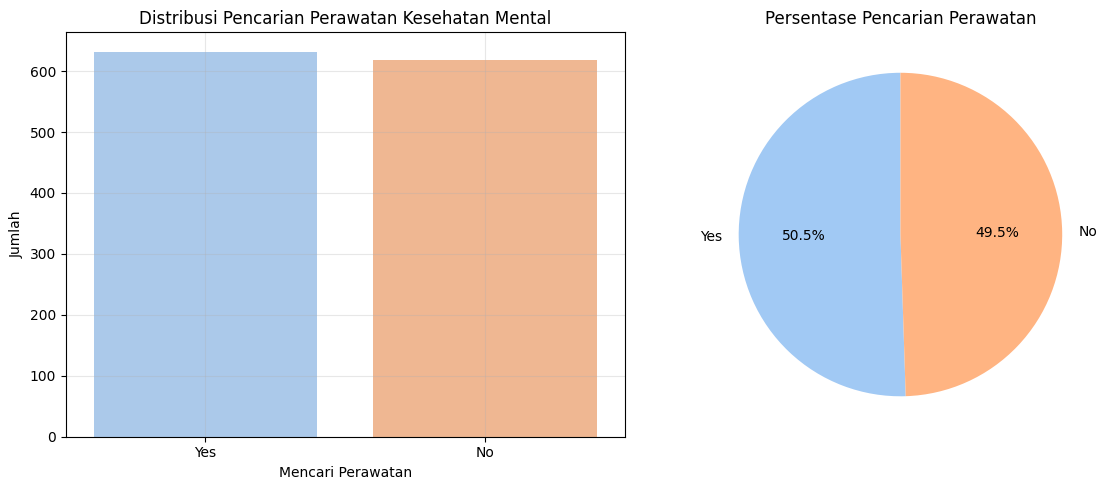

Distribusi kelas target cukup seimbang, yang baik untuk pemodelan.


In [ ]:
# Analisis target variable (treatment)
plt.figure(figsize=(12, 5))

# Distribusi 'treatment'
plt.subplot(1, 2, 1)
sns.countplot(x='treatment', data=df_cleaned, palette='pastel')
plt.title('Distribusi Pencarian Perawatan Kesehatan Mental')
plt.xlabel('Mencari Perawatan')
plt.ylabel('Jumlah')
plt.grid(True, alpha=0.3)

# Persentase 'treatment'
plt.subplot(1, 2, 2)
treatment_counts = df_cleaned['treatment'].value_counts()
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Persentase Pencarian Perawatan')
plt.ylabel('')

plt.tight_layout()
plt.show()

print("Distribusi kelas target cukup seimbang, yang baik untuk pemodelan.")

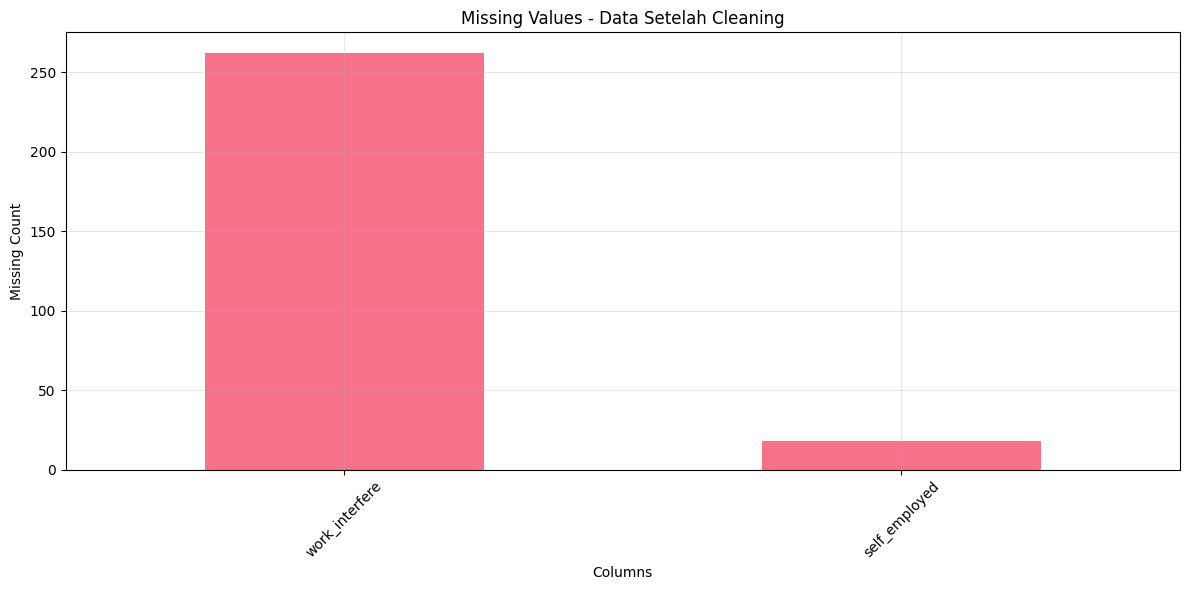

=== MISSING VALUES - Data Setelah Cleaning ===
work_interfere: 262 (20.9%)
self_employed: 18 (1.4%)


In [ ]:
# Analisis missing values setelah cleaning
def analyze_missing_values(df, title):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

    if len(missing_data) > 0:
        plt.figure(figsize=(12, 6))
        missing_data.plot(kind='bar')
        plt.title(f'Missing Values - {title}')
        plt.xlabel('Columns')
        plt.ylabel('Missing Count')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        print(f"=== MISSING VALUES - {title} ===")
        for col, count in missing_data.items():
            percentage = (count / len(df)) * 100
            print(f"{col}: {count} ({percentage:.1f}%)")
    else:
        print(f"✅ Tidak ada missing values dalam {title}!")

    return missing_data

missing_after_cleaning = analyze_missing_values(df_cleaned, "Data Setelah Cleaning")

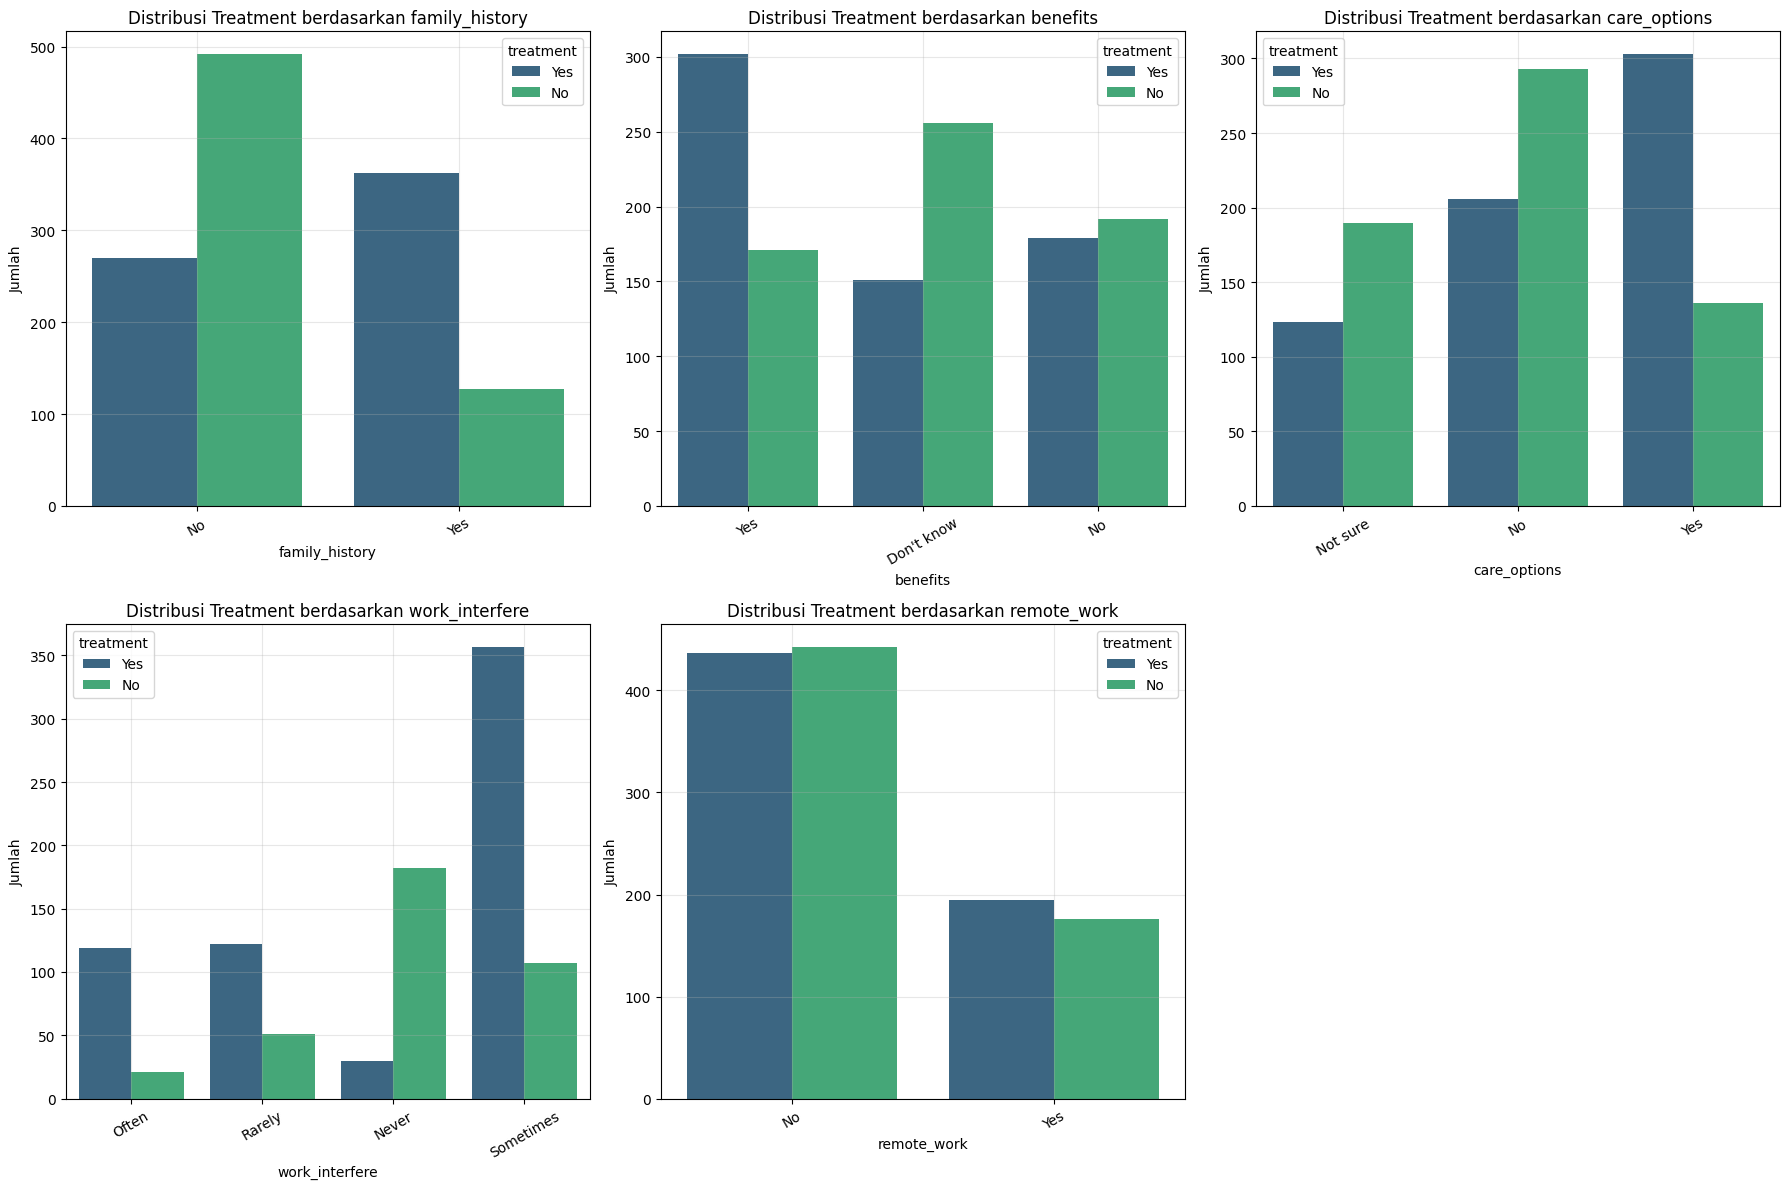

=== INSIGHTS FITUR KATEGORIKAL ===
• Karyawan dengan riwayat keluarga (family_history='Yes') lebih cenderung mencari perawatan.
• Menariknya, mereka yang tahu tentang benefit kesehatan mental dari perusahaan ('benefits'='Yes') juga lebih banyak mencari perawatan.
• Interferensi pekerjaan ('work_interfere') yang sering terjadi berkorelasi kuat dengan pencarian perawatan.


In [ ]:
# Analisis fitur kategorikal penting terhadap target
categorical_features = ['family_history', 'benefits', 'care_options', 'work_interfere', 'remote_work']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()
fig.delaxes(axes[5]) # Hapus subplot keenam yang tidak terpakai

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='treatment', data=df_cleaned, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribusi Treatment berdasarkan {feature}')
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== INSIGHTS FITUR KATEGORIKAL ===")
print("• Karyawan dengan riwayat keluarga (family_history='Yes') lebih cenderung mencari perawatan.")
print("• Menariknya, mereka yang tahu tentang benefit kesehatan mental dari perusahaan ('benefits'='Yes') juga lebih banyak mencari perawatan.")
print("• Interferensi pekerjaan ('work_interfere') yang sering terjadi berkorelasi kuat dengan pencarian perawatan.")


## 4. Data Preprocessing

In [ ]:
# Handle missing values, lalu encode semua fitur menjadi numerik
print("Memproses data untuk pemodelan...")
# Imputasi nilai yang hilang
# 'self_employed' diisi dengan modus
df_cleaned['self_employed'].fillna(df_cleaned['self_employed'].mode()[0], inplace=True)
# 'work_interfere' diisi dengan 'Don't know' karena ini adalah pilihan dalam survei
df_cleaned['work_interfere'].fillna('Don\'t know', inplace=True)

print(f"Missing values setelah imputasi: {df_cleaned.isnull().sum().sum()}")

# Tentukan X dan y
X = df_cleaned.drop('treatment', axis=1)
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(df_cleaned['treatment'])

# Identifikasi kolom kategorikal dan numerik
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Encoding fitur kategorikal dengan OrdinalEncoder (untuk tree-based models)
X_encoded = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

print("\n✅ Data preprocessing selesai!")
print(f"Shape data fitur (X): {X_encoded.shape}")
print(f"Shape target (y): {y.shape}")

Memproses data untuk pemodelan...
Missing values setelah imputasi: 0

✅ Data preprocessing selesai!
Shape data fitur (X): (1251, 22)
Shape target (y): (1251,)


In [ ]:


# Split data menjadi train, validation, dan test
# 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp # 0.25 x 0.8 = 0.2 dari total
)

print("=== DATA SPLITTING (3-WAY SPLIT) ===")
print(f"X_train shape: {X_train.shape} ({len(X_train)/len(X_encoded)*100:.1f}%)")
print(f"X_val shape: {X_val.shape} ({len(X_val)/len(X_encoded)*100:.1f}%)")
print(f"X_test shape: {X_test.shape} ({len(X_test)/len(X_encoded)*100:.1f}%)")
print(f"Total: {len(X_train) + len(X_val) + len(X_test)} samples")

# Feature scaling untuk model linear dan SVM
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data splitting dan scaling selesai!")

=== DATA SPLITTING (3-WAY SPLIT) ===
X_train shape: (750, 22) (60.0%)
X_val shape: (250, 22) (20.0%)
X_test shape: (251, 22) (20.1%)
Total: 1251 samples

✅ Data splitting dan scaling selesai!


## 5. Model Training & Evaluation

In [ ]:
# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(probability=True, random_state=42)
}

# Dictionary untuk menyimpan hasil
results = {}
predictions = {}

print("=== TRAINING MODELS ===")
print("Model yang akan dilatih:")
for name in models.keys():
    print(f"  • {name}")
print()

for name, model in models.items():
    print(f"Training {name}...", end=" ")

    # Gunakan data scaled untuk model linear dan SVM
    if name in ['SVC', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Simpan prediksi
    predictions[name] = y_pred

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Model': model
    }

    print(f"✅ F1-Score: {f1:.4f}")

print("\n🎉 Training selesai!")

=== TRAINING MODELS ===
Model yang akan dilatih:
  • Logistic Regression
  • Decision Tree
  • Random Forest
  • Gradient Boosting
  • XGBoost
  • SVC

Training Logistic Regression... ✅ F1-Score: 0.7952
Training Decision Tree... ✅ F1-Score: 0.7184
Training Random Forest... ✅ F1-Score: 0.8464
Training Gradient Boosting... ✅ F1-Score: 0.8321
Training XGBoost... ✅ F1-Score: 0.8108
Training SVC... ✅ F1-Score: 0.8346

🎉 Training selesai!


In [ ]:
# Evaluasi dan ranking model
results_df = pd.DataFrame({k: {metric: v[metric] for metric in ['Accuracy', 'F1-Score', 'ROC-AUC']} for k, v in results.items()}).T
results_df = results_df.sort_values('F1-Score', ascending=False)

print("=== HASIL EVALUASI MODEL (VALIDATION SET) ===")
print(f"{'Rank':<4} {'Model':<20} {'F1-Score':<10} {'Accuracy':<10} {'ROC-AUC':<10}")
print("-" * 60)

for i, (model_name, row) in enumerate(results_df.iterrows(), 1):
    print(f"{i:<4} {model_name:<20} {row['F1-Score']:<10.4f} {row['Accuracy']:<10.4f} {row['ROC-AUC']:<10.4f}")

# Model terbaik
best_model_name = results_df.index[0]
best_f1 = results_df.loc[best_model_name, 'F1-Score']

print(f"\n🏆 MODEL TERBAIK: {best_model_name}")
print(f"📊 F1-Score: {best_f1:.4f}")

=== HASIL EVALUASI MODEL (VALIDATION SET) ===
Rank Model                F1-Score   Accuracy   ROC-AUC   
------------------------------------------------------------
1    Random Forest        0.8464     0.8360     0.8743    
2    SVC                  0.8346     0.8240     0.8610    
3    Gradient Boosting    0.8321     0.8240     0.8715    
4    XGBoost              0.8108     0.8040     0.8650    
5    Logistic Regression  0.7952     0.7960     0.8782    
6    Decision Tree        0.7184     0.7240     0.7242    

🏆 MODEL TERBAIK: Random Forest
📊 F1-Score: 0.8464


## 6. Feature Importance Analysis

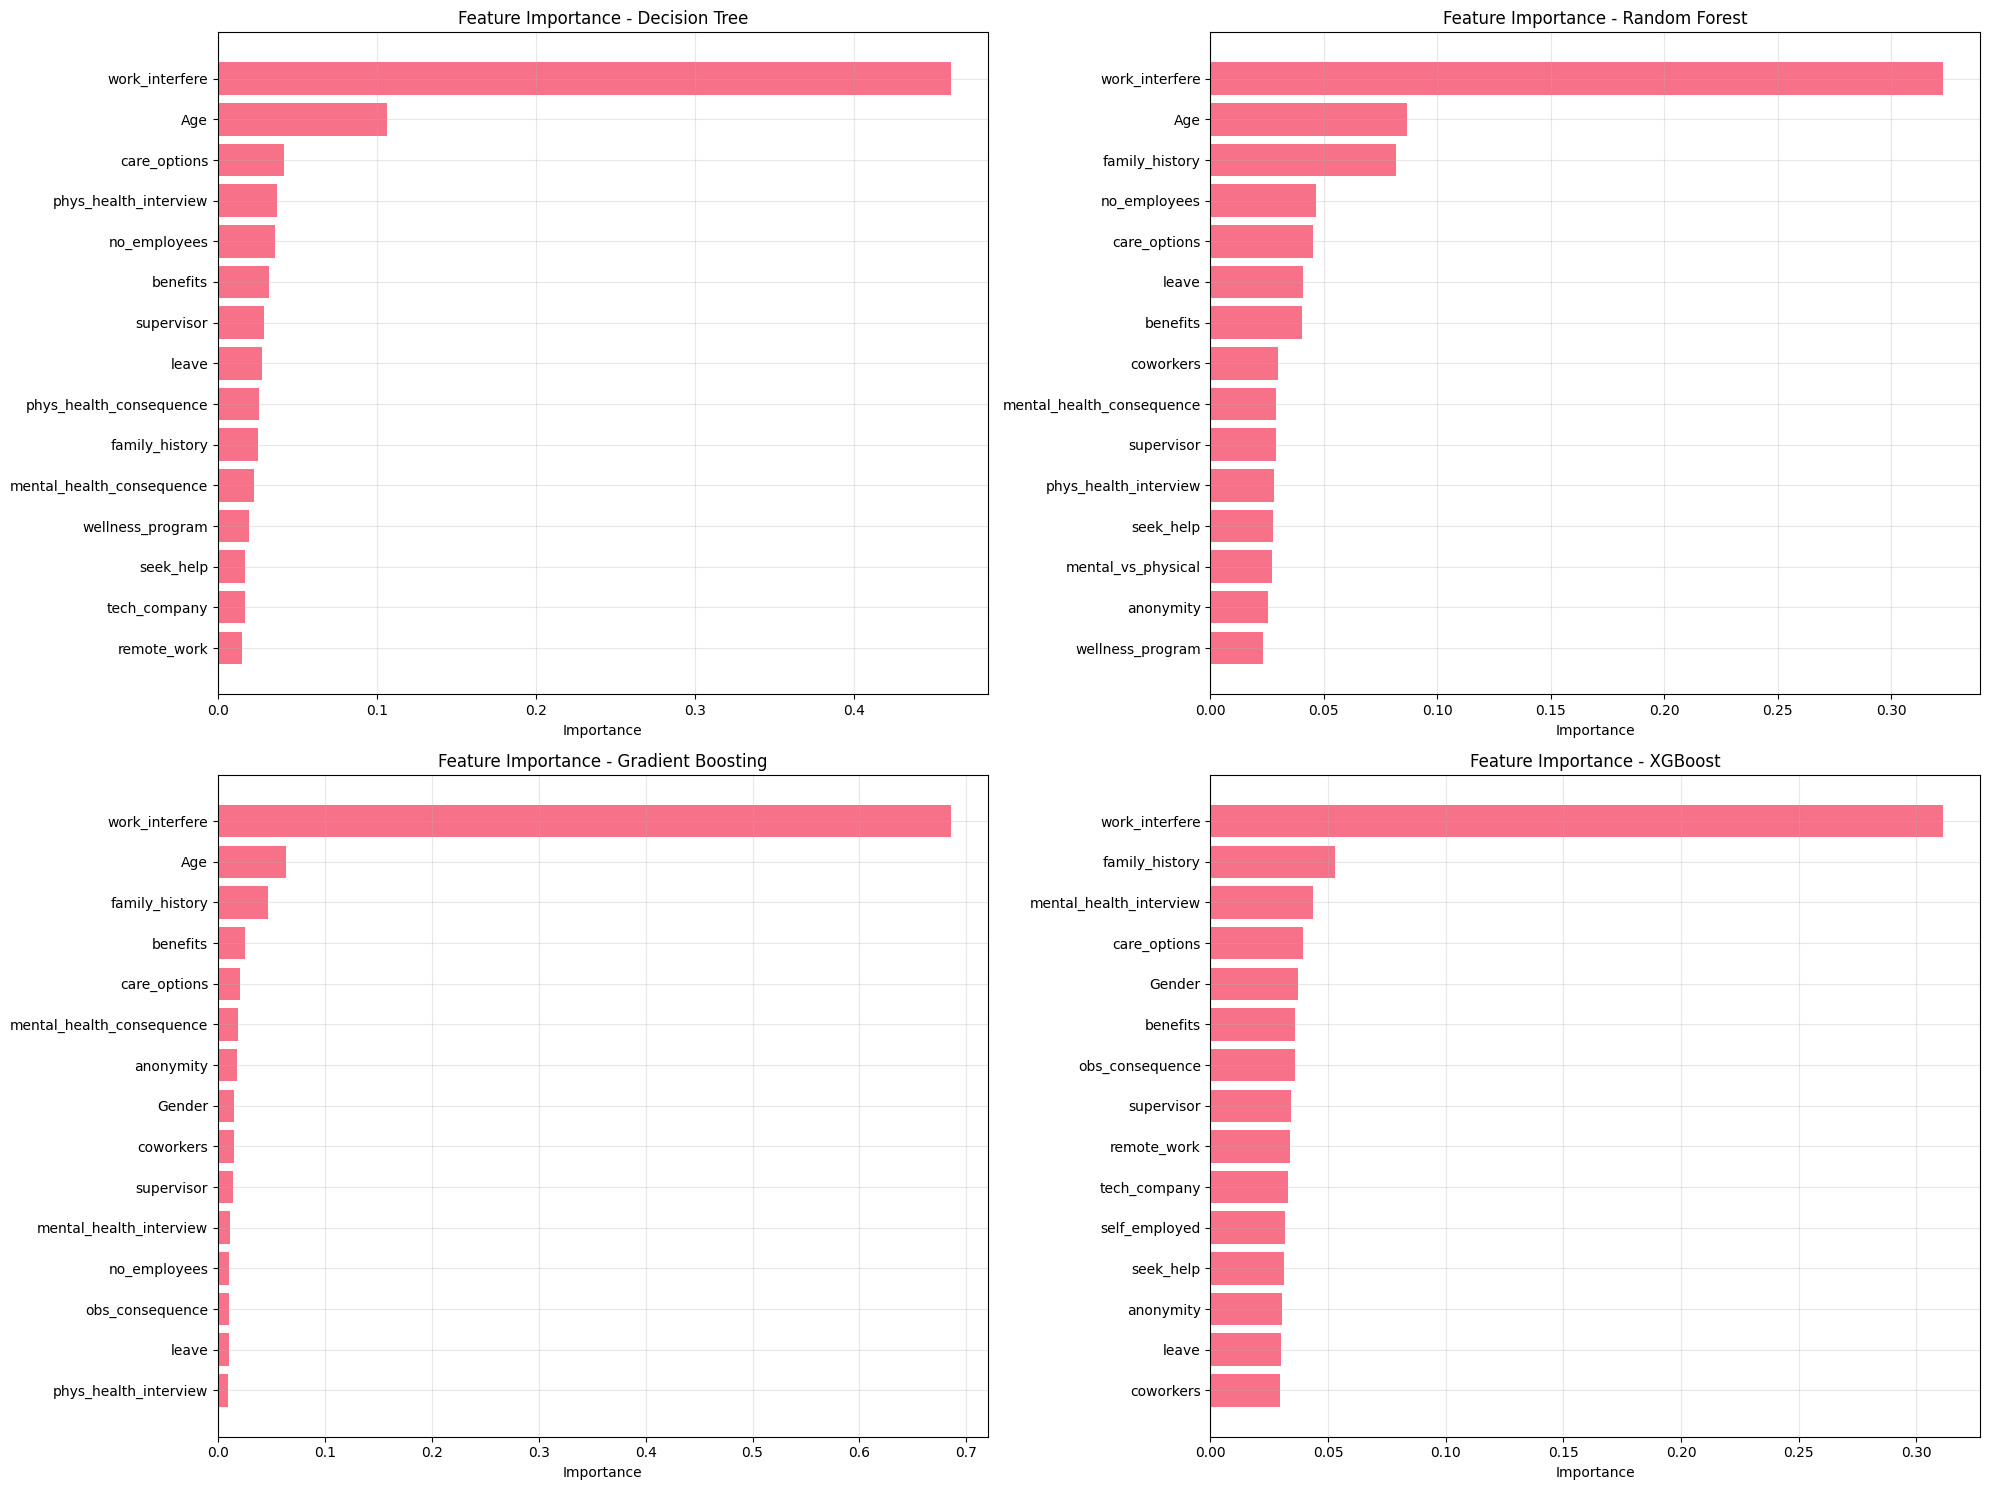


=== TOP 10 FEATURE IMPORTANCE - Random Forest ===
  • work_interfere      : 0.3230
  • Age                 : 0.0866
  • family_history      : 0.0818
  • no_employees        : 0.0464
  • care_options        : 0.0451
  • leave               : 0.0410
  • benefits            : 0.0402
  • coworkers           : 0.0298
  • mental_health_consequence: 0.0291
  • supervisor          : 0.0288


In [ ]:
# Analisis feature importance untuk tree-based models
tree_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
available_tree_models = [m for m in tree_models if m in results]

if available_tree_models:
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    axes = axes.ravel()

    for i, model_name in enumerate(available_tree_models):
        model = results[model_name]['Model']

        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
            feature_imp_df = pd.DataFrame({
                'Feature': X.columns,
                'Importance': importance
            }).sort_values('Importance', ascending=True)

            top_features = feature_imp_df.tail(15)
            axes[i].barh(top_features['Feature'], top_features['Importance'])
            axes[i].set_title(f'Feature Importance - {model_name}')
            axes[i].set_xlabel('Importance')
            axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    if best_model_name in available_tree_models:
        best_model_imp = pd.DataFrame({
            'Feature': X.columns,
            'Importance': results[best_model_name]['Model'].feature_importances_
        }).sort_values('Importance', ascending=False)

        print(f"\n=== TOP 10 FEATURE IMPORTANCE - {best_model_name} ===")
        for _, row in best_model_imp.head(10).iterrows():
            print(f"  • {row['Feature']:<20}: {row['Importance']:.4f}")

## 7. Comprehensive Visualization

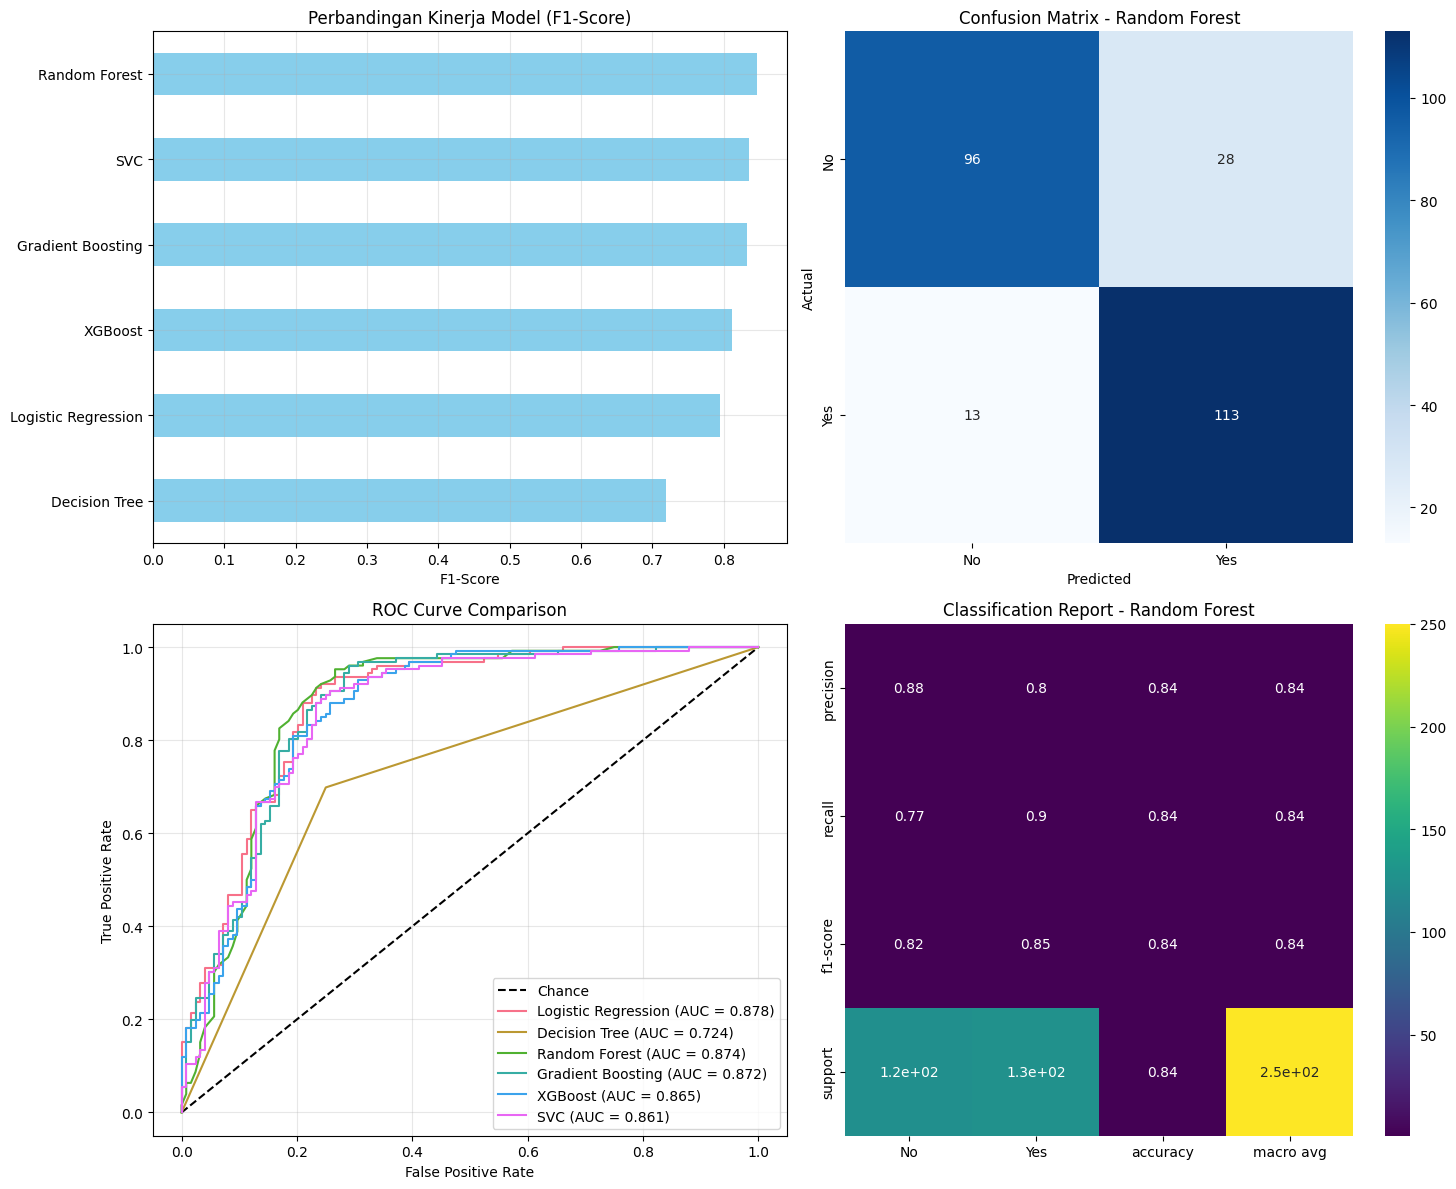

In [ ]:


# Visualisasi komprehensif hasil
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Performance Comparison (F1-Score)
results_df['F1-Score'].sort_values().plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Perbandingan Kinerja Model (F1-Score)')
axes[0, 0].set_xlabel('F1-Score')
axes[0, 0].grid(True, alpha=0.3)

# 2. Confusion Matrix (Best Model)
best_model_predictions = predictions[best_model_name]
cm = confusion_matrix(y_val, best_model_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[0, 1].set_title(f'Confusion Matrix - {best_model_name}')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# 3. ROC Curve Comparison
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Chance')
for name, model_data in results.items():
    model = model_data['Model']
    if name in ['SVC', 'Logistic Regression']:
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    axes[1, 0].plot(fpr, tpr, label=f"{name} (AUC = {model_data['ROC-AUC']:.3f})")
axes[1, 0].set_title('ROC Curve Comparison')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].legend(loc='lower right')
axes[1, 0].grid(True, alpha=0.3)

# 4. Classification Report (Best Model)
report = classification_report(y_val, best_model_predictions, target_names=['No', 'Yes'], output_dict=True)
report_df = pd.DataFrame(report).transpose()
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='viridis', ax=axes[1, 1])
axes[1, 1].set_title(f'Classification Report - {best_model_name}')

plt.tight_layout()
plt.show()

## 8. Final Test Set Evaluation

In [ ]:
# Evaluasi final dengan test set
print("=== EVALUASI FINAL DENGAN TEST SET ===")
print(f"Menggunakan model terbaik ({best_model_name}) untuk prediksi test set...")

# Prediksi dengan model terbaik
best_model_final = results[best_model_name]['Model']

if best_model_name in ['SVC', 'Logistic Regression']:
    test_predictions = best_model_final.predict(X_test_scaled)
else:
    test_predictions = best_model_final.predict(X_test)

# Hitung metrik untuk test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print(f"\n📊 HASIL FINAL TEST SET - {best_model_name}:")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
print(f"F1-Score: {test_f1:.4f}")
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, test_predictions, target_names=['No Treatment', 'Sought Treatment']))

# Bandingkan dengan validation set
print(f"\n📈 PERBANDINGAN VALIDATION vs TEST:")
print(f"{'Metric':<10} {'Validation':<12} {'Test':<12} {'Difference':<12}")
print("-" * 50)
val_accuracy = results_df.loc[best_model_name, 'Accuracy']
val_f1 = results_df.loc[best_model_name, 'F1-Score']
print(f"{'Accuracy':<10} {val_accuracy:<11.4f} {test_accuracy:<11.4f} {abs(test_accuracy-val_accuracy):<11.4f}")
print(f"{'F1-Score':<10} {val_f1:<11.4f} {test_f1:<11.4f} {abs(test_f1-val_f1):<11.4f}")

# Interpretasi hasil
f1_diff = abs(test_f1 - val_f1)
if f1_diff < 0.05:
    print(f"\n✅ Model STABIL: Perbedaan F1-Score < 0.05 ({f1_diff:.4f})")
    print("   Model menunjukkan generalisasi yang baik dan tidak overfitting.")
else:
    print(f"\n⚠️ Model KURANG STABIL: Perbedaan F1-Score > 0.05 ({f1_diff:.4f})")
    print("   Model mungkin sedikit overfitting, namun masih dapat diterima.")

=== EVALUASI FINAL DENGAN TEST SET ===
Menggunakan model terbaik (Random Forest) untuk prediksi test set...

📊 HASIL FINAL TEST SET - Random Forest:
Accuracy: 0.8526 (85.3%)
F1-Score: 0.8614

Laporan Klasifikasi Lengkap:
                  precision    recall  f1-score   support

    No Treatment       0.89      0.80      0.84       124
Sought Treatment       0.82      0.91      0.86       127

        accuracy                           0.85       251
       macro avg       0.86      0.85      0.85       251
    weighted avg       0.86      0.85      0.85       251


📈 PERBANDINGAN VALIDATION vs TEST:
Metric     Validation   Test         Difference  
--------------------------------------------------
Accuracy   0.8360      0.8526      0.0166     
F1-Score   0.8464      0.8614      0.0150     

✅ Model STABIL: Perbedaan F1-Score < 0.05 (0.0150)
   Model menunjukkan generalisasi yang baik dan tidak overfitting.
